# A_inornata Genome Quality Assessment

The goal of this project is to assess the quality of the A. inornata genome that was produce by Dovetail Genomics


## Transcriptome Assembly

I am using Trinity to adapter trim, normalize and assemble a transcriptome for A inornata. Five different tissue samples will be used (blood, brain, heart, germinal bed, and testes).


### Trinity

I concatinated all of the reads from each tissue together by R1 and R2 (PE read designation). Leaving a single R1 and R2 for heart, blood, brain, testes, and germinal bed (blood_R1.fastq.gz, blood_R2.fastq.gz, brain_R1.fastq.gz, brain_R2.fastq.gz, germinalbed_R1.fastq.gz, germinalbed_R2.fastq.gz, heart_R1.fastq.gz, heart_R2.fastq.gz, testes_R1.fastq.gz, testes_R2.fastq.gz)


In [ ]:
#author: tfording

#FILES: Blood
#Trinity --seqType fq --SS_lib_type RF --left /n/projects/tfording/a_inornata/blood_R1.fastq.gz --right /n/projects/tfording/a_inornata/RNAseq_data/blood_R2.fastq.gz --CPU 24 --max_memory 600G --normalize_reads --verbose --min_kmer_cov 2 --min_contig_length 200 --output /n/projects/tfording/a_inornata/RNAseq_data/Trinity_blood --trimmomatic --quality_trimming_params "ILLUMINACLIP:/n/apps/CentOS7/bin/trinityrnaseq-2.1.1/trinity-plugins/Trimmomatic/adapters/TruSeq3-PE.fa:2:30:10 SLIDINGWINDOW:4:5 LEADING:5 TRAILING:5 MINLEN:25"

#FILES: Brain
#Trinity --seqType fq --SS_lib_type RF --left /n/projects/tfording/a_inornata/RNAseq_data/brain_R1.fastq.gz --right /n/projects/tfording/a_inornata/RNAseq_data/brain_R2.fastq.gz --CPU 24 --max_memory 600G --normalize_reads --verbose --min_kmer_cov 2 --min_contig_length 200 --output /n/projects/tfording/a_inornata/RNAseq_data/Trinity_brain --quality_trimming_params "ILLUMINACLIP:/n/apps/CentOS7/bin/trinityrnaseq-2.1.1/trinity-plugins/Trimmomatic/adapters/TruSeq3-PE.fa:2:30:10 SLIDINGWINDOW:4:5 LEADING:5 TRAILING:5 MINLEN:25"

#FILES: GerminalBed
#Trinity --seqType fq --SS_lib_type RF --left /n/projects/tfording/a_inornata/RNAseq_data/germinalbed_R1.fastq.gz --right /n/projects/tfording/a_inornata/RNAseq_data/germinalbed_R2.fastq.gz --CPU 24 --max_memory 600G --normalize_reads --verbose --min_kmer_cov 2 --min_contig_length 200 --output /n/projects/tfording/a_inornata/RNAseq_data/Trinity_germinalbed --quality_trimming_params "ILLUMINACLIP:/n/apps/CentOS7/bin/trinityrnaseq-2.1.1/trinity-plugins/Trimmomatic/adapters/TruSeq3-PE.fa:2:30:10 SLIDINGWINDOW:4:5 LEADING:5 TRAILING:5 MINLEN:25"

#FILES: Heart
#Trinity --seqType fq --SS_lib_type RF --left /n/projects/tfording/a_inornata/RNAseq_data/heart_R1.fastq.gz --right /n/projects/tfording/a_inornata/RNAseq_data/heart_R2.fastq.gz --CPU 24 --max_memory 600G --normalize_reads --verbose --min_kmer_cov 2 --min_contig_length 200 --output /n/projects/tfording/a_inornata/RNAseq_data/Trinity_heart --quality_trimming_params "ILLUMINACLIP:/n/apps/CentOS7/bin/trinityrnaseq-2.1.1/trinity-plugins/Trimmomatic/adapters/TruSeq3-PE.fa:2:30:10 SLIDINGWINDOW:4:5 LEADING:5 TRAILING:5 MINLEN:25"

#FILES: Testes
#Trinity --seqType fq --SS_lib_type RF --left /n/projects/tfording/a_inornata/RNAseq_data/testes_R1.fastq.gz --right /n/projects/tfording/a_inornata/RNAseq_data/testes_R2.fastq.gz --CPU 24 --max_memory 600G --normalize_reads --verbose --min_kmer_cov 2 --min_contig_length 200 --output /n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes --quality_trimming_params "ILLUMINACLIP:/n/apps/CentOS7/bin/trinityrnaseq-2.1.1/trinity-plugins/Trimmomatic/adapters/TruSeq3-PE.fa:2:30:10 SLIDINGWINDOW:4:5 LEADING:5 TRAILING:5 MINLEN:25"


I normalized by tissue type to a min kmer count of 2, max coverage of 50 (see http://ivory.idyll.org/blog/trinity-in-silico-normalize.html for how trinity's in silico normalization works) and minimum contig length of 200. 


#### Post Trinity Stats

**Script:**

In [2]:
# author: tfording

import numpy
import argparse
import os
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

def parse_trinity_fasta(input_file_path):
    '''
    This function will iterate through a trinity fasta and pull lengths from header lines to pass to various functions
    :param input_file_path: Directory to file
    :return: Above parameters in a table format
    '''
    length_array = []
    fh = open(input_file_path, "r")

    for line in fh:
        if str(line[0]) == '>':
            line = line.split()
            length = line[1]
            length = length[4:]
            length_array.append(length)
    length_array_int = []

    for item in length_array:
        item = int(item)
        length_array_int.append(item)

    min = min_contig(length_array_int)
    max = max_contig(length_array_int)
    total_size = total_size_in_bp(length_array_int)
    file_name = parse_file_name(input_file_path)
    num_contigs = len(length_array_int)
    median = median_contig(length_array_int)
    average = average_contig(length_array_int)
    n_50 = N50_func(length_array_int, total_size)

    print 'File Name:', file_name
    print 'Number of Contigs:', num_contigs
    print 'Total Size:', total_size
    print 'Min Contig Size:', min
    print 'Max Contig Size:', max
    print 'Average Contig Size:', average
    print 'Median Contig Size:', median
    print 'N50:', n_50
    contig_length_dist(length_array_int, file_name)


def contig_length_dist(length_array, file_name):
    '''
    This function plots a length distribution
    :param length_array:
    :return:
    '''
    #plt.show(sns.distplot(length_array, bins=40, kde=False, rug=True, axlabel='Contig Length', label=file_name+' contig dist'))

def N50_func(length_array, total_len):
    '''
    Calculates N50 of given array
    :param length_array: array of integers
    :return: N50 of array
    '''
    new_list = sorted(length_array)
    len_count = 0
    pos_count = 0
    for i in new_list:
        len_count += i
        if len_count >= (total_len/2.0):
            return i


def average_contig(length_array):
    '''
    :param length_array: Array of integers
    :return: mean of array
    '''
    return numpy.mean(length_array)


def median_contig(length_array):
    '''
    :param length_array: array of integers
    :return: median of array
    '''
    return numpy.median(length_array)


def parse_file_name(path_to_file):
    '''
    :param path_to_file: directory (str)
    :return: Just the file name
    '''
    path_to_file= path_to_file.split('/')
    return path_to_file[-1]


def min_contig(length_array):
    '''
    :param length_array: array of integers
    :return: min of array
    '''
    min_contig = min(length_array)
    return min_contig


def max_contig(length_array):
    '''
    :param length_array: array of integers
    :return: max of array
    '''
    max_contig = max(length_array)
    return max_contig


def total_size_in_bp(length_array):
    '''
    :param length_array: array of integers
    :return: sum of integers in array
    '''
    total_size = 0
    for item in length_array:
        total_size += item
    return total_size


In [3]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_blood/blood_Trinity.fasta')

File Name: blood_Trinity.fasta
Number of Contigs: 289077
Total Size: 302896770
Min Contig Size: 201
Max Contig Size: 21467
Average Contig Size: 1047.80653597
Median Contig Size: 439.0
N50: 2301


In [4]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_brain/brain_Trinity.fasta')

File Name: brain_Trinity.fasta
Number of Contigs: 69560
Total Size: 44777863
Min Contig Size: 201
Max Contig Size: 14145
Average Contig Size: 643.73006038
Median Contig Size: 355.0
N50: 978


In [5]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_germinalbed/germinalbed_Trinity.fasta')

File Name: germinalbed_Trinity.fasta
Number of Contigs: 72688
Total Size: 41130150
Min Contig Size: 201
Max Contig Size: 10914
Average Contig Size: 565.845118864
Median Contig Size: 342.0
N50: 750


In [6]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_heart/heart_Trinity.fasta')

File Name: heart_Trinity.fasta
Number of Contigs: 48047
Total Size: 30567142
Min Contig Size: 201
Max Contig Size: 25486
Average Contig Size: 636.192519824
Median Contig Size: 350.0
N50: 956


In [7]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes/testes_Trinity.fasta')

File Name: testes_Trinity.fasta
Number of Contigs: 52506
Total Size: 36439377
Min Contig Size: 201
Max Contig Size: 14746
Average Contig Size: 694.004056679
Median Contig Size: 375.0
N50: 1145


#### Troubleshooting

Duncan and my data sets are drastically different in number of reads retained after normalization and trimmomatic. I am going to investigate which step within trinity cause the massive loss in reads in my data set. 

##### Trimmomatic

In [12]:
#java -jar /n/apps/CentOS7/bin/trinityrnaseq-2.1.1/trinity-plugins/Trimmomatic/trimmomatic-0.32.jar PE -threads 4 \
#/n/projects/tfording/a_inornata/RNAseq_data/testes_R1.fastq.gz \
#/n/projects/tfording/a_inornata/RNAseq_data/testes_R2.fastq.gz \
#-baseout testesdiagnosis \


After running trimmomatic on the testes data set, 115,305,156 reads were retained from the original 115,660,629 reads. This is a net loss of 355,473 reads. Trimmomatic is not responsible for the massive loss in data. 


##### Trinity (2.3.2)

Installed trinity 2.3.2 via anaconda.


In [ ]:
#/n/projects/tfording/anaconda2/bin/Trinity --seqType fq --SS_lib_type RF --left /n/projects/tfording/a_inornata/RNAseq_data/testes_R1.fastq.gz --right /n/projects/tfording/a_inornata/RNAseq_data/testes_R2.fastq.gz --CPU 16 --max_memory 400G --normalize_reads --verbose --min_kmer_cov 2 --min_contig_length 200 --output /n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes_2.3.2 --quality_trimming_params "ILLUMINACLIP:/n/projects/tfording/anaconda2/pkgs/trinity-2.3.2-0/opt/trinity-2.3.2/trinity-plugins/Trimmomatic-0.32/adapters/TruSeq3-PE.fa:2:30:10 SLIDINGWINDOW:4:5 LEADING:5 TRAILING:5 MINLEN:25"

In [8]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes_2.3.2/testes_Trinity_2.3.2.fasta')

File Name: testes_Trinity_2.3.2.fasta
Number of Contigs: 52123
Total Size: 36838397
Min Contig Size: 201
Max Contig Size: 14825
Average Contig Size: 706.75895478
Median Contig Size: 380.0
N50: 1180


##### BUSCO

After running Trinity 2.3.2 I got a very similar set of data, so I ran BUSCO (at Duncan's request) on both of my generated testes data sets, as well as on his. I ran BUSCO on both CEGs and the Tetrapod references. I installed BUSCO and its supporting programs via anaconda.


In [ ]:
## EUKARYOTA
# Trinity 2.1.1
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes/testes_Trinity.fasta -o EUK_trinity_2.1.1 -l /n/projects/tfording/BUSCO_lineages/eukaryota_odb9 -m tran -c 4

# Trinity 2.3.2
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes_2.3.2/testes_Trinity_2.3.2.fasta -o EUK_trinity_2.3.2 -l /n/projects/tfording/BUSCO_lineages/eukaryota_odb9 -m tran -c 4

# Duncan's Testes (Trinity 2.3.2)
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/dut/a_marmorata/teste_transcriptome_sex_determ/data/trinity_out/Trinity.fasta -o EUK_duncans_testes_trinity_2.3.2 -l /n/projects/tfording/BUSCO_lineages/eukaryota_odb9 -m tran -c 4

## TETRAPODA
# Trinity 2.1.1
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes/testes_Trinity.fasta -o TET_trinity_2.1.1 -l /n/projects/tfording/BUSCO_lineages/tetrapoda_odb9 -m tran -c 4

# Trinity 2.3.2
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes_2.3.2/testes_Trinity_2.3.2.fasta -o TET_trinity_2.3.2 -l /n/projects/tfording/BUSCO_lineages/tetrapoda_odb9 -m tran -c 4

# Duncan's Testes (Trinity 2.3.2)
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/dut/a_marmorata/teste_transcriptome_sex_determ/data/trinity_out/Trinity.fasta -o TET_duncans_testes_trinity_2.3.2 -l /n/projects/tfording/BUSCO_lineages/tetrapoda_odb9 -m tran -c 4


**Results from BUSCO: (TESTES)**


* INORNATA TRINITY 2.1.1 BUSCO: CEGs
	* 196	Complete BUSCOs (C) **64.7%**
	* 150	Complete and single-copy BUSCOs (S) **49.5%**
	* 46	Complete and duplicated BUSCOs (D) **15.2%**
	* 71	Fragmented BUSCOs (F) **23.4%**
	* 36	Missing BUSCOs (M) **11.9%**
	* 303	Total BUSCO groups searched


* INORNATA TRINITY 2.3.2 BUSCO: CEGs
	* 198	Complete BUSCOs (C) **65.3%**
	* 151	Complete and single-copy BUSCOs (S) **49.8%**
	* 47	Complete and duplicated BUSCOs (D) **5.5%**
	* 69	Fragmented BUSCOs (F) **22.8%**
	* 36	Missing BUSCOs (M) **11.9%**
	* 303	Total BUSCO groups searched


* MARMORATA TRINITY 2.3.2 BUSCO: CEGs
	* 296	Complete BUSCOs (C) **97.7%**
	* 64	Complete and single-copy BUSCOs (S) **21.1%**
	* 232	Complete and duplicated BUSCOs (D) **76.6%**
	* 7	Fragmented BUSCOs (F) **2.3%**
	* 0	Missing BUSCOs (M) **0.0%**
	* 303	Total BUSCO groups searched


* INORNATA TRINITY 2.1.1 BUSCO: TETRAPOD 
	* 1384	Complete BUSCOs (C) **35.0%**
	* 909	Complete and single-copy BUSCOs (S) **23.0%**
	* 475	Complete and duplicated BUSCOs (D) **12.0%**
	* 761	Fragmented BUSCOs (F) **19.3%**
	* 1805	Missing BUSCOs (M) **45.7%**
	* 3950	Total BUSCO groups searched


* INORNATA TRINITY 2.3.2 BUSCO: TETRAPOD
	* 1402	Complete BUSCOs (C) **35.5%**
	* 903	Complete and single-copy BUSCOs (S) **22.9%**
	* 499	Complete and duplicated BUSCOs (D) **12.6%**
	* 753	Fragmented BUSCOs (F) **19.1%**
	* 1795	Missing BUSCOs (M) **45.4%**
	* 3950	Total BUSCO groups searched


* MARMORATA TRINITY 2.3.2 BUSCO: TETRAPOD
	* 3207	Complete BUSCOs (C) **81.2%**
	* 856	Complete and single-copy BUSCOs (S) **21.7%**
	* 2351	Complete and duplicated BUSCOs (D) **59.5%**
	* 501	Fragmented BUSCOs (F) **12.7%**
	* 242	Missing BUSCOs (M) **6.1%**
	* 3950	Total BUSCO groups searched


My data set continues to appear to be drastically less informative. I am going to run Trinity (2.3.2) on the testes data set, without doing a normalization in an attempt to get more contigs and contigs of higher quality.


##### Kmer Distributions 

In [4]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import os
import math


def histogram(file_path):
    '''
    This function takes a jellyfish.kmers.fa.histo file from Trinity and plots a histogram.
    :param file_path: Path to jellyfish.kmers.fa.histo
    :return: Nothing is returned, a histogram is plotted
    '''
    fh = open(file_path, "r")
    kmer_freq = []
    num_kmers = []

    for line in fh:
        line = line.split()
        kmer_freq.append(int(line[0]))
        num_kmers.append(math.log10(int(line[1])))
    #print kmer_freq, num_kmers
    # the histogram of the data

    fig = plt.figure()
    ax = fig.add_subplot(111)

    fig_size = plt.rcParams["figure.figsize"]

    fig.set_size_inches(10,12)

    ax.bar(kmer_freq, num_kmers, width=100, color='b', edgecolor='b')

    ax.set_xlabel('Freq of Kmer')
    ax.set_ylabel('Num of Kmer (Log10)')
    ax.set_title('Kmer Dist')

    ax.grid(True)

    plt.show()


I decided to do kmer distributions (at the reccomendation of both Duncan and Aaron) to see how my seemingly problematic datasets compared to Duncan's data set which performed very well in BUSCO


**A. inornata Trinity 2.1.1 (Testes)**


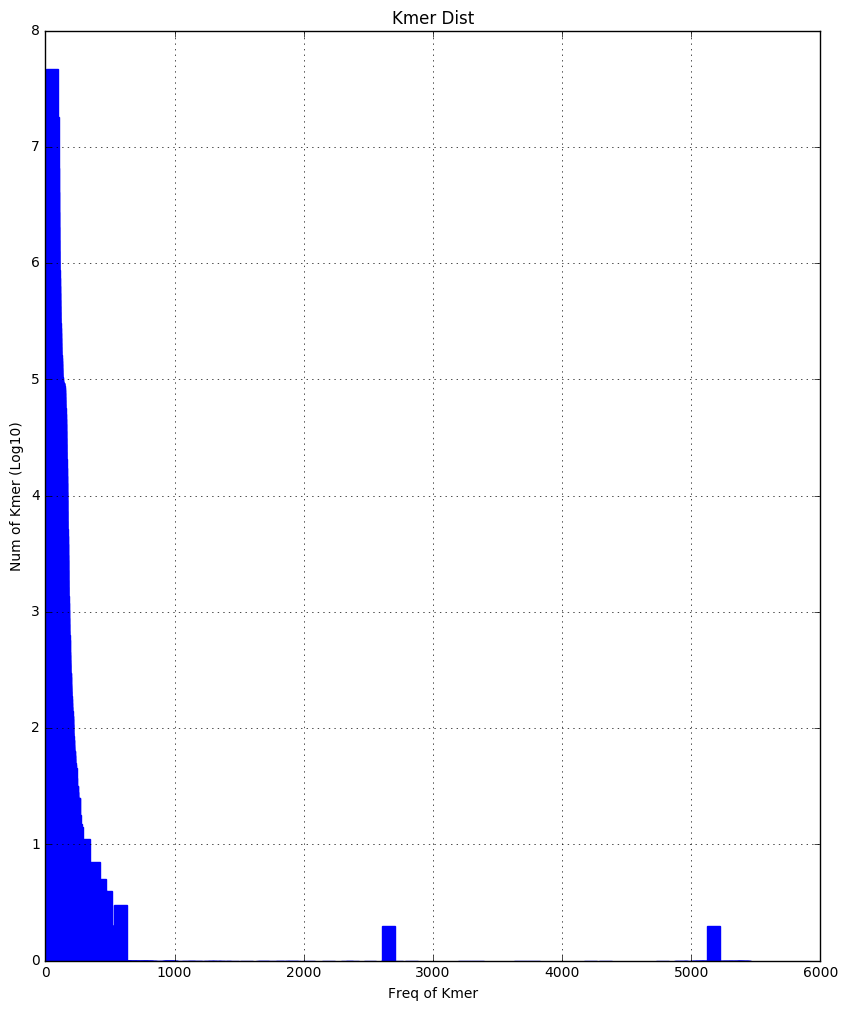

In [5]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes/jellyfish.kmers.fa.histo')

**A. inornata Trinity 2.3.2 (Testes)**

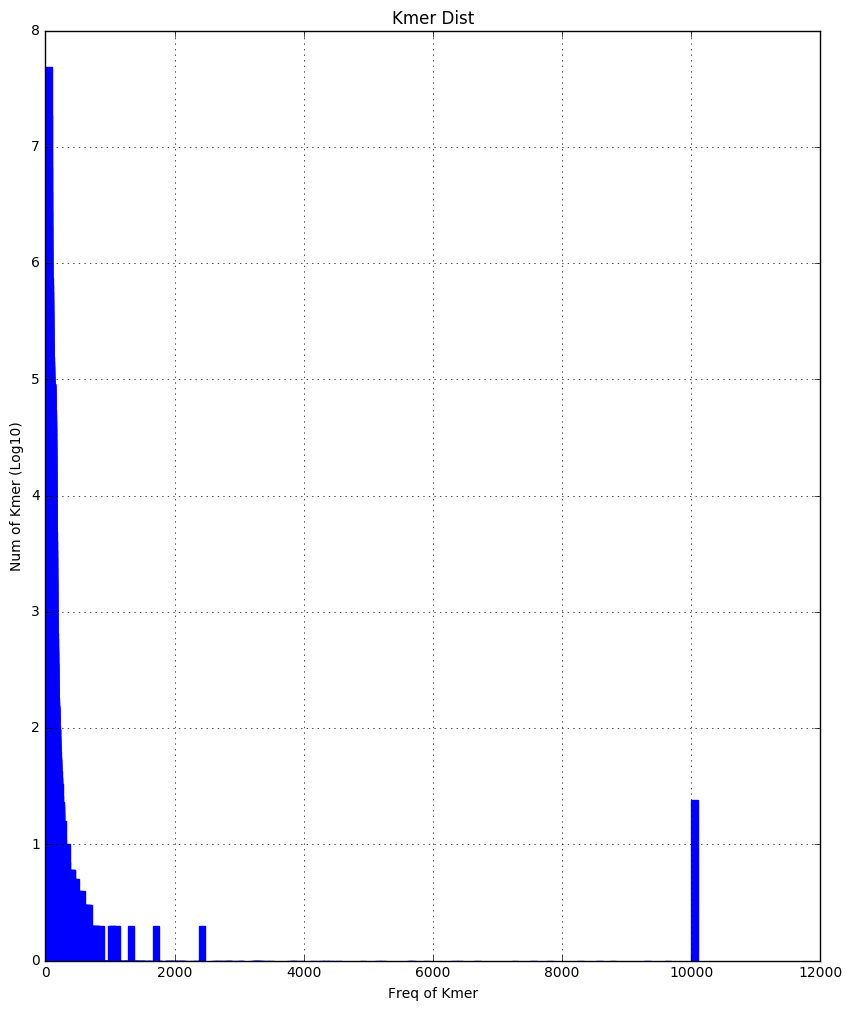

In [6]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes_2.3.2/jellyfish.kmers.fa.histo')

**A. marmorata Trinity 2.3.2 (Testes) DUNCAN'S DATA SET**


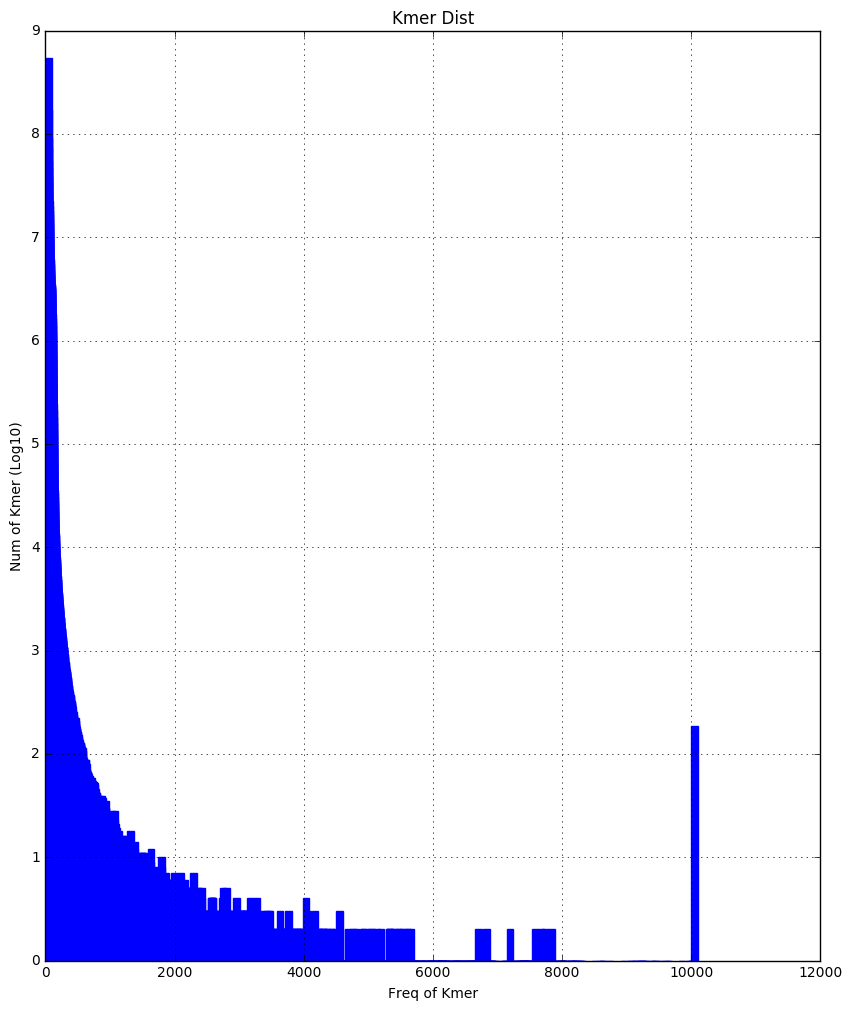

In [5]:
histogram('/n/projects/dut/a_marmorata/teste_transcriptome_sex_determ/data/trinity_out/jellyfish.kmers.fa.histo')

**Trinity 2.1.1 Brain**

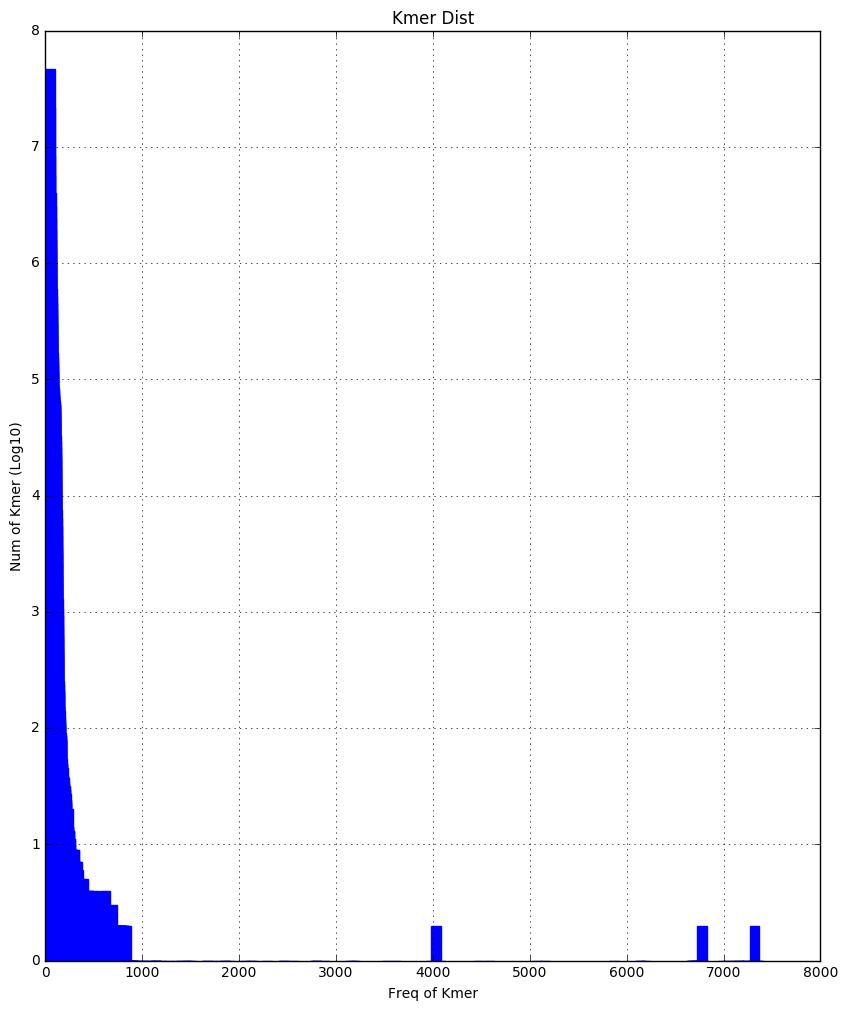

In [6]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_brain/jellyfish.kmers.fa.histo')

**Trinity 2.1.1 Germinal Bed**

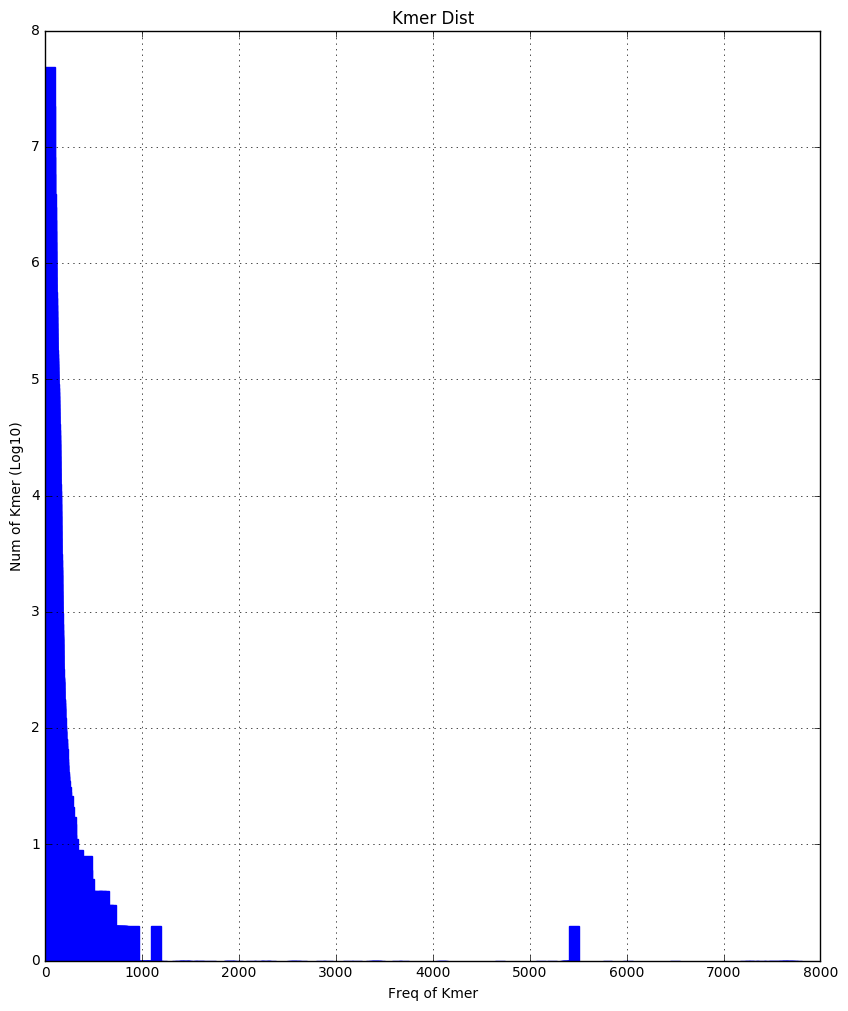

In [7]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_germinalbed/jellyfish.kmers.fa.histo')

**Trinity 2.1.1 Heart**

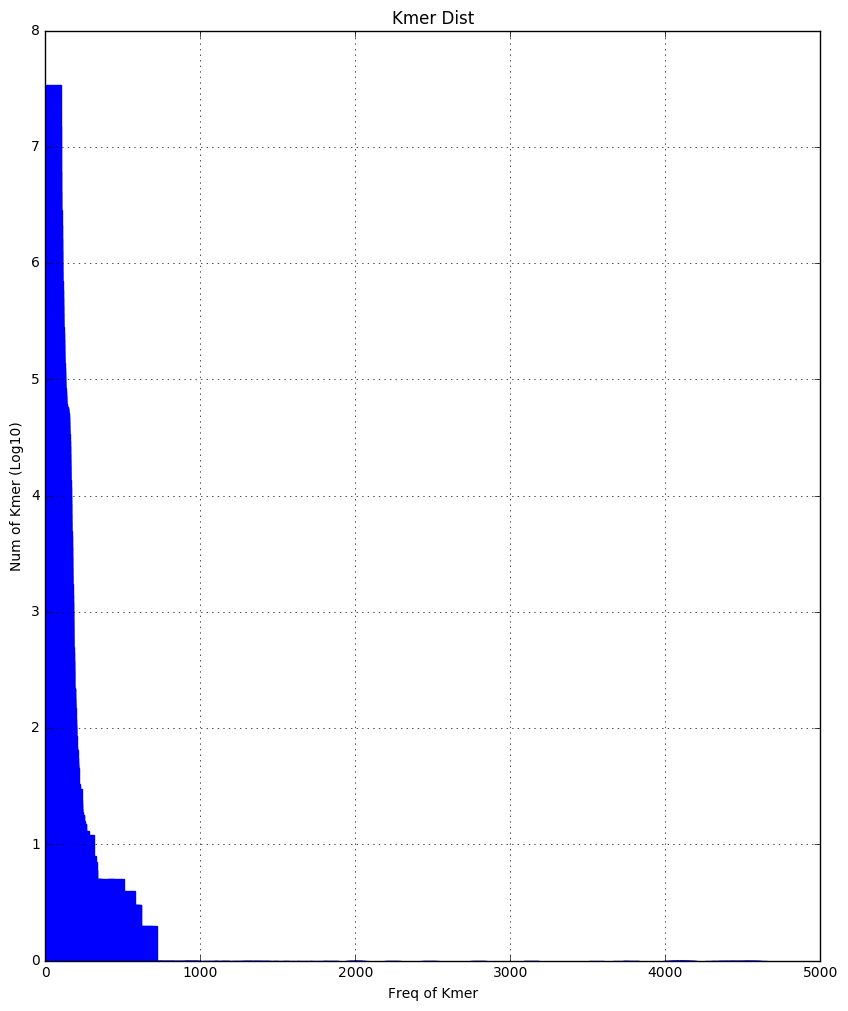

In [8]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_heart/jellyfish.kmers.fa.histo')

My distributions seem to drop off rather quickly (with the exception of the blood library which is below), while Duncan's spread much more nicely. This implies a loss of complexity in the data set. I am going to talking to Rachel and see if she did anything differently with these data sets, and run the entire set of data together through Trinity 2.3.2 and see how it looks.

After talking to Rachel, there wasn't anything notable done differently with the data set. I am hoping that a non-normalized run will restore the kmer complexity.

**Blood Library**

Looking at the blood library, it seems to have done better through the Trinity normalization step.
* raw blood reads: 90,758,319
* normalized: 19,709,140

I also ran it through BUSCO and got the following numbers back:.

* CEGs    
    * 294 Complete BUSCOs (C) **97.0%**
    * 97 Complete and single-copy BUSCOs (S) **32.0%**
    * 197 Complete and duplicated BUSCOs (D) **65.0%**
    * 9 Fragmented BUSCOs (F) **3.0%**
    * 0 Missing BUSCOs (M) **0.0%**
    * 303 Total BUSCO groups searched
* TET
	* 2865	Complete BUSCOs (C) **72.5%**
	* 971	Complete and single-copy BUSCOs (S) **24.6%**
	* 1894	Complete and duplicated BUSCOs (D) **47.9%**
	* 326	Fragmented BUSCOs (F) **8.3%**
	* 759	Missing BUSCOs (M) **19.2%**
	* 3950	Total BUSCO groups searched


**Trinity 2.1.1 Blood**

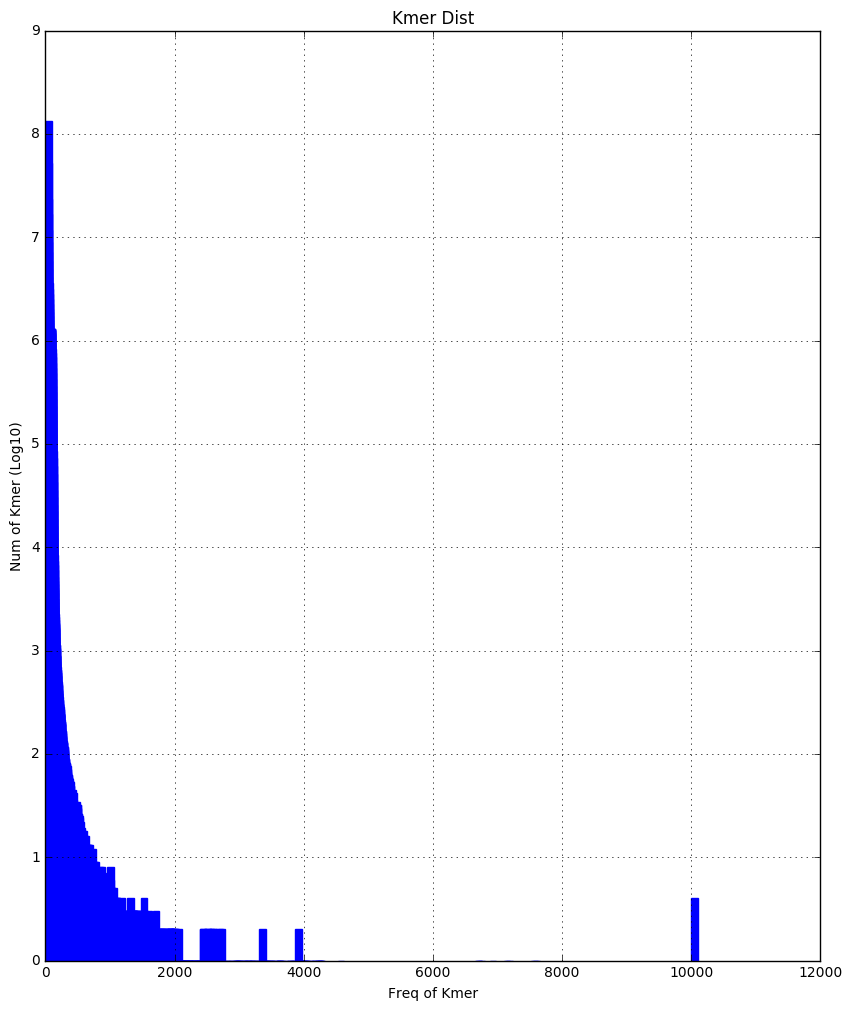

In [8]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_blood/jellyfish.kmers.fa.histo')

**Testes Trinity (2.3.2) Without Normalization**

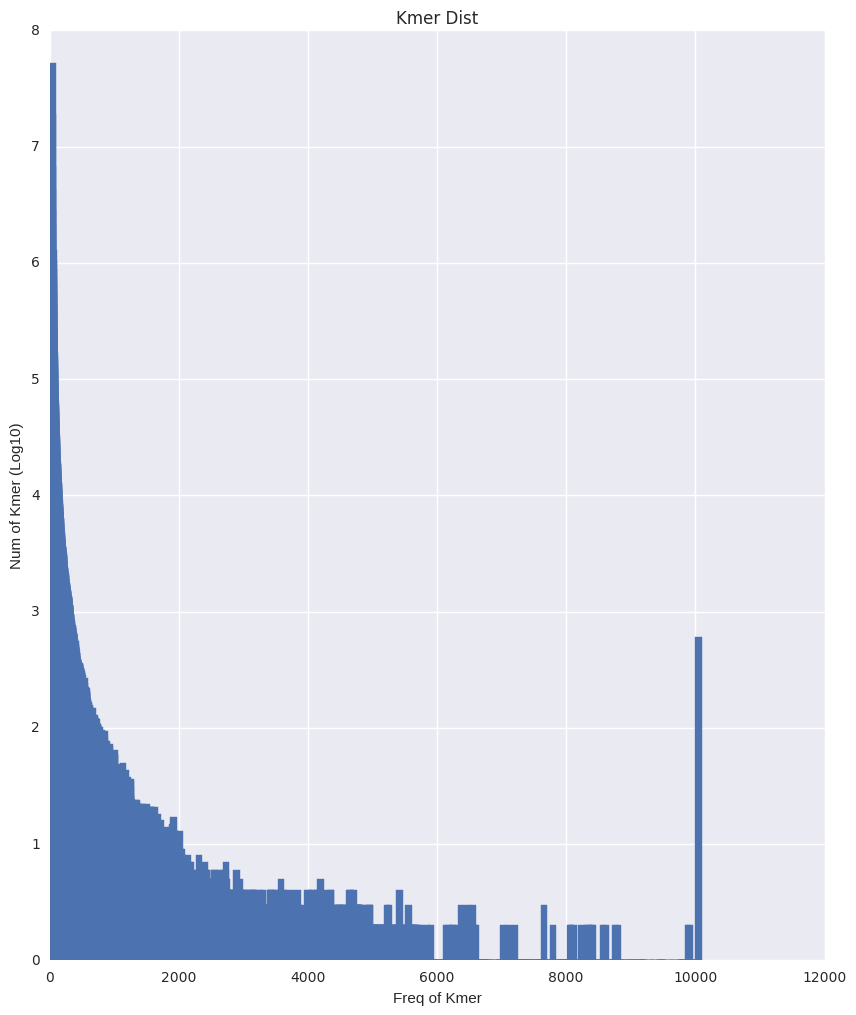

In [14]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/not_normalized_Trinity_testes_2.3.2/jellyfish.kmers.fa.histo')

BUSCO Results for Non-normalized testes:

* CEGS
    * 234 Complete BUSCOs (C) **77.2%**
    * 178 Complete and single-copy BUSCOs (S) **58.7%**
    * 56 Complete and duplicated BUSCOs (D) **18.5%**
    * 51 Fragmented BUSCOs (F) **16.8%**
    * 18 Missing BUSCOs (M) **6.0%**
    * 303 Total BUSCO groups searched
* TETRAPOD
    * 768 Complete BUSCOs (C) **44.7%**
    * 1146 Complete and single-copy BUSCOs (S) **29.0%**
    * 622 Complete and duplicated BUSCOs (D) **15.7%**
    * 810 Fragmented BUSCOs (F) **20.5%**
    * 1372 Missing BUSCOs (M) **34.8%**
    * 3950 Total BUSCO groups searched


In [9]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/not_normalized_Trinity_testes_2.3.2/Trinity.fasta')

File Name: Trinity.fasta
Number of Contigs: 81023
Total Size: 54860022
Min Contig Size: 201
Max Contig Size: 15982
Average Contig Size: 677.091961542
Median Contig Size: 353.0
N50: 1145


### All Tissue Trinity (2.3.2) Assembly

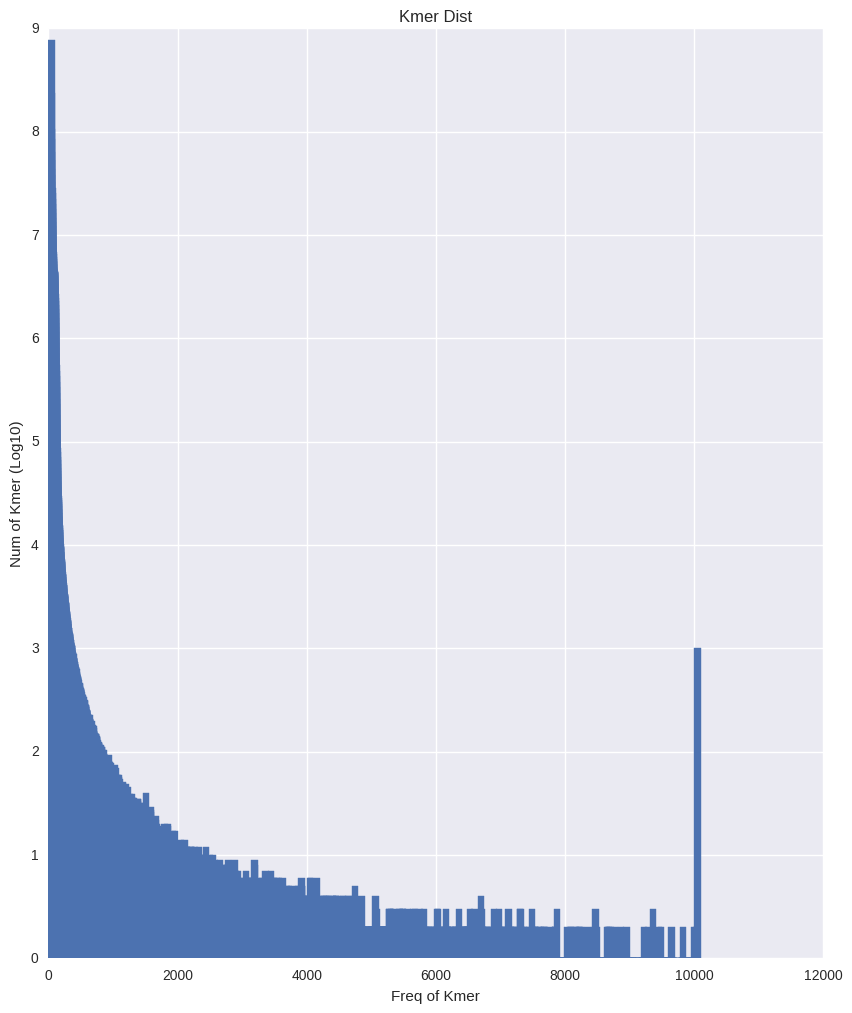

In [5]:
histogram('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_alltissues_2.3.2/jellyfish.kmers.fa.histo')

This distribution seems normal in complexity. 

In [10]:
parse_trinity_fasta('/n/projects/tfording/a_inornata/RNAseq_data/Trinity_alltissues_2.3.2/Trinity.fasta')

File Name: Trinity.fasta
Number of Contigs: 1662368
Total Size: 1111513484
Min Contig Size: 201
Max Contig Size: 28295
Average Contig Size: 668.632627673
Median Contig Size: 379.0
N50: 988


* BUSCO CEGs Results:
    * 273 Complete BUSCOs (C) **90.1%**
    * 53 Complete and single-copy BUSCOs (S) **17.5%**
    * 220 Complete and duplicated BUSCOs (D) **72.6%**
    * 29 Fragmented BUSCOs (F) **9.6%**
    * 1 Missing BUSCOs (M) **0.3%**
    * 303 Total BUSCO groups searched
* BUSCO Tetrapod Results:
    * 3136 Complete BUSCOs (C) **79.4%**
    * 878 Complete and single-copy BUSCOs (S) **22.2%**
    * 2258 Complete and duplicated BUSCOs (D) **57.2%**
    * 700 Fragmented BUSCOs (F) **17.7%**
    * 114 Missing BUSCOs (M) **2.9%**
    * 3950 Total BUSCO groups searched



**DUNCAN'S A.marmorata**

* BUSCO CEGs Results:
    * 284 Complete BUSCOs (C) **93.8%**
    * 82 Complete and single-copy BUSCOs (S) **27.1%**
    * 202 Complete and duplicated BUSCOs (D) **66.7%**
    * 18 Fragmented BUSCOs (F) **5.9%**
    * 1 Missing BUSCOs (M) **0.3%**
    * 303 Total BUSCO groups searched
* BUSCO Tetrapod Results:
    * 3255 Complete BUSCOs (C) **82.5%**
    * 1037 Complete and single-copy BUSCOs (S) **26.3%**
    * 2218 Complete and duplicated BUSCOs (D) **56.2%**
    * 600 Fragmented BUSCOs (F) **15.2%**
    * 95 Missing BUSCOs (M) **2.3%**
    * 3950 Total BUSCO groups searched


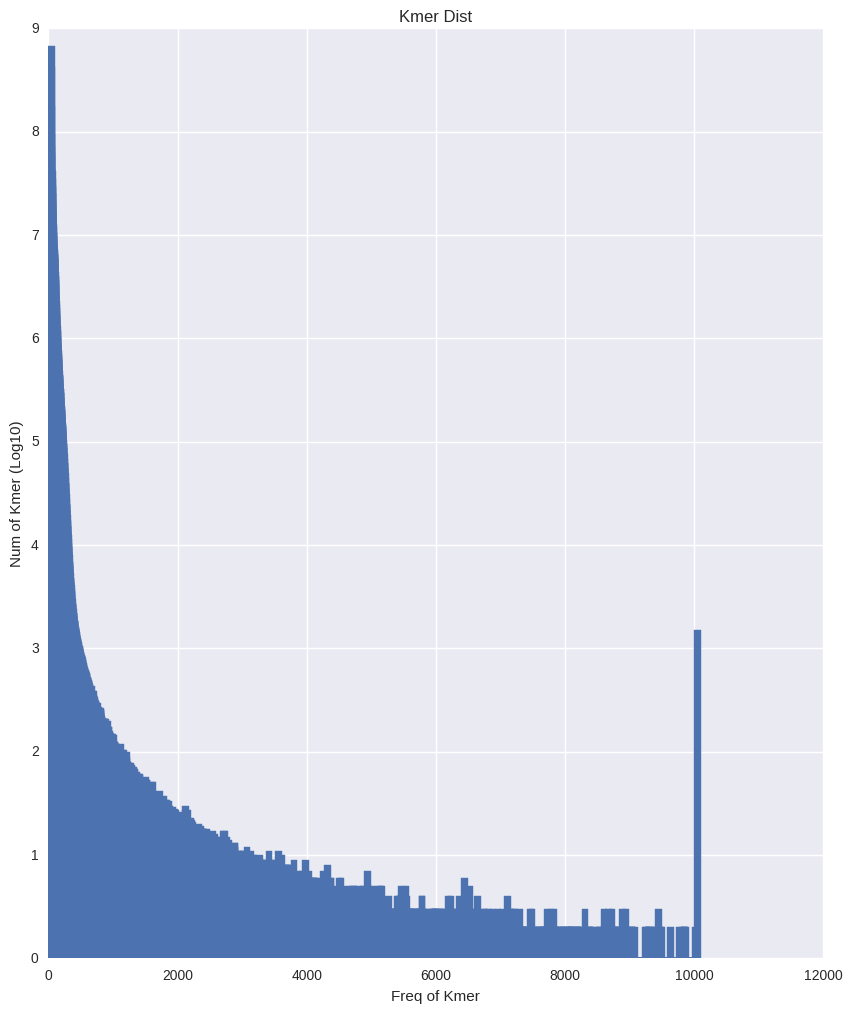

In [6]:
histogram('/n/projects/dut/a_marmorata/marmorata_comprehensive_transcriptome/data/trinity_out/jellyfish.kmers.fa.histo')

In [11]:
parse_trinity_fasta('/n/projects/dut/a_marmorata/marmorata_comprehensive_transcriptome/data/trinity_out/Trinity.fasta')

File Name: Trinity.fasta
Number of Contigs: 2218131
Total Size: 1413658492
Min Contig Size: 201
Max Contig Size: 24998
Average Contig Size: 637.319658758
Median Contig Size: 377.0
N50: 908


### Summary
* Total bp in transcriptome: 1130843204
* Total transcripts in transcriptome: 1662367
* The mean transcript length is: 680.260859365

The A. inornata transcriptome is comparable to the A. marmorata transcriptome in terms of BUSCOs. So I will continue forward with the genome annotation.

In [ ]:
#BUSCO SCRIPT
python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/transcriptome/inornataTranscriptome.fasta -o ino_trans_VERT_BUSCO.out -l /n/projects/tfording/BUSCO_lineages/vertebrata_odb9 -m tran -c 4

### BUSCO Script example

In [5]:
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/RNAseq_data/Trinity_testes_2.3.2/testes_Trinity_2.3.2.fasta -o EUK_trinity_2.3.2 -l /n/projects/tfording/BUSCO_lineages/eukaryota_odb9 -m tran -c 4

## Genome Mask

Goal of this portion is to mask out repeats in the genome using repeat modeler and repeat masker.

In [1]:
#BuildDatabase -name AspInornata -engine ncbi AspIno_2.0.fasta 
#RepeatModeler -engine ncbi -pa 16 -database AspInornata

**Note to self:** Repeat Modeler takes a LLLLOOOONNNNNGGGG time. 10+ days. After repeatmodeler sat at the same step for over 3 days, I decided to kill the script and start it with more threads. The script would not restart so I had to start it over.

* Step 5 took 120 hours
* Step 6 took 240+

RepeatModeler did not output the file I needed. Instead of spending more time on this I'm going to move forward using the masked inornata genome Rutendo created. File loc: '/n/projects/tfording/a_inornata/repeatmodeler/RM_42558.SunJun260011112016/consensi.fa.classified'

In [ ]:
#RepeatMasker -xsmall -gff -s -pa 20 -lib /n/projects/tfording/a_inornata/repeatmodeler/RM_42558.SunJun260011112016/consensi.fa.classified /n/projects/tfording/genomes/AspIno_2.0.fasta -dir /n/projects/tfording/a_inornata > repeatmasker.out 

**File Name: AspIno_2.0.fasta**
* sequences: 1172
* total length: 1528101006 bp (1511313112 bp excl N/X-runs)
* GC level: **42.46 %**
* bases masked: 646865925 bp (42.33 %)


            Number of Elements   |   Length Occupied       | Percentage of Sequence    |
* SINEs:             295887   |   49230611 bp |     3.22 %     |
    * ALUs            12600   |    1175022 bp |     0.08 %     | 
    * MIRs           189271   |   37285204 bp |     2.44 %     | 


* LINEs:             757284   |  168150683 bp |    11.00 %     |
    * LINE1           26898   |    9823120 bp |     0.64 %     | 
    * LINE2          334498   |   73271199 bp |     4.79 %     |
    * L3/CR1         261685   |   60605970 bp |     3.97 %     |
    
    
* LTR elements:      103909   |   27998616 bp |     1.83 %     |
    * ERVL             7774   |    1288103 bp |     0.08 %     |
    * ERVL-MaLRs          0   |          0 bp |     0.00 %     |
    * ERV_classI       1107   |     319068 bp |     0.02 %     |
    * ERV_classII      1132   |     289710 bp |     0.02 %     |


* DNA elements:      301265   |   54417934 bp |     3.56 %     |
   * hAT-Charlie      78883   |   16228489 bp |     1.06 %     |
   * TcMar-Tigger     21762   |    3160903 bp |     0.21 %     |


* Unclassified:     1475208   |  314017294 bp |    20.55 %     |


* Total interspersed repeats: 613815138 bp |    40.17 %     
* Small RNA:          17706   |    2689236 bp |     0.18 % 


* Satellites:         7089   |     975113 bp |     0.06 %     |
* Simple repeats:    429526   |   34238343 bp |     2.24 %     |
* Low complexity:     32771   |    1713435 bp |     0.11 %     |

## Mapping RNAseq to Masked Genome

Following the pipeline that was used for the marmorata genome, I am mapping the reads back using STAR.

### STAR Genome Index Generation

In [2]:
#STAR --runThreadN 8 --runMode genomeGenerate --genomeDir /n/projects/tfording/a_inornata/genome --genomeFastaFiles /n/projects/tfording/a_inornata/AspIno_2.0.fasta.masked --limitGenomeGenerateRAM 200000000000

**Index Out:**

* Apr 03 13:49:27 ..... started STAR run
* Apr 03 13:49:27 ... starting to generate Genome files
* Apr 03 13:50:07 ... starting to sort Suffix Array. This may take a long time...
* Apr 03 13:50:18 ... sorting Suffix Array chunks and saving them to disk...
* Apr 03 14:01:00 ... loading chunks from disk, packing SA...
* Apr 03 14:02:15 ... finished generating suffix array
* Apr 03 14:02:15 ... generating Suffix Array index
* Apr 03 14:07:51 ... completed Suffix Array index
* Apr 03 14:07:51 ... writing Genome to disk ...
* Apr 03 14:08:00 ... writing Suffix Array to disk ...
* Apr 03 14:08:38 ... writing SAindex to disk
* Apr 03 14:08:44 ..... finished successfully

### STAR Mapping

In [1]:
#STAR --readFilesIn /n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CAGATC_2_R1_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CAGATC_2_R2_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CAGATC_R1_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CAGATC_R2_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CGATGT_2_R1_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CGATGT_2_R2_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CGATGT_R1_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_CGATGT_R2_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_GTGAAA_2_R1_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_GTGAAA_2_R2_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_GTGAAA_R1_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1655_GTGAAA_R2_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ACAGTG_2_R1_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ACAGTG_2_R2_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ACAGTG_R1_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ACAGTG_R2_brain.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ATGTCA_2_R1_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ATGTCA_2_R2_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ATGTCA_R1_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_ATGTCA_R2_testes.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_GCCAAT_2_R1_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_GCCAAT_2_R2_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_GCCAAT_R1_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1656_GCCAAT_R2_heart.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1684_CCGTCC_2_R1_germinalbed.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1684_CCGTCC_2_R2_germinalbed.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1684_CCGTCC_R1_germinalbed.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG1684_CCGTCC_R2_germinalbed.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG897_CGTACG_2_R1_blood.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG897_CGTACG_2_R2_blood.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG897_CGTACG_R1_blood.fastq.gz,/n/projects/tfording/a_inornata/data/raw_data/RNA_seq/MOLNG897_CGTACG_R2_blood.fastq.gz --readFilesCommand gunzip -c --genomeDir /n/projects/tfording/a_inornata/genome/STAR_genome --outFileNamePrefix /n/projects/tfording/a_inornata/data/STAR_alignments_run1_april17 --runThreadN 8 --twopassMode Basic --alignSJoverhangMin 8 --alignSJDBoverhangMin 5 --outSAMtype BAM SortedByCoordinate --limitBAMsortRAM 50000000000 --outFilterType Normal


In [ ]:
STAR --readFilesIn --readFilesCommand “cat” --genomeDir ../data/marm_ref --outFileNamePrefix ../data/100_million_alignments_2ndpass/merged_samples_ --runThreadN 8 --alignSJoverhangMin 8 --alignSJDBoverhangMin 5 --sjdbFileChrStartEnd ../data/100_million_alignments/merged_samples_SJ.out.tab --outSAMtype BAM SortedByCoordinate --limitBAMsortRAM 50000000000 --outFilterType Normal

### Masked Genome BUSCO

In [ ]:
python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/genome/inornata_09Jan2016_DgKHC_uppercase.fasta. masked -o ino_masked_vert_BUSCO.out -l /n/projects/tfording/BUSCO_lineages/vertebrata_odb9 -m genome -c 4  

**NOTE TO SELF:** BUSCO requires a path to Augustus to be set. This is done by typing the following into the command line environment:

export AUGUSTUS_CONFIG_PATH=/n/projects/tfording/anaconda2/pkgs/augustus-3.2.3-boost1.60_0/config

**BUSCO OUTPUT:**
* 2480	Complete BUSCOs (C) **95.9%**
* 2465	Complete and single-copy BUSCOs (S) **95.3%**
* 15	Complete and duplicated BUSCOs (D) **0.6%**
* 65	Fragmented BUSCOs (F) **2.5%**
* 41	Missing BUSCOs (M) **1.6%**
* 2586	Total BUSCO groups searched


## BRAKER: Augustus Training

**Installed using Anaconda command:** conda install -c bioconda braker=1.9

Lots of perl dependencies were missing. After trying to install the needed dependencies, Anaconda informed me of conflicts between packages of different versions. It appears as if I need to use an older version of perl to allow for the Logger::Simple module to be installed from CPAN. To do this I created a separate Conda Environment named Braker1Perl. This is where I am installing the needed packages for Braker.

5May2017: Installing in a new environment didn't work. Duncan said that he used the site wide version of perl. This resolved the Logger::Simple issue, but BRAKER still failed after trying to run it.  

**Command to run BRAKER1:**

In [ ]:
/n/projects/tfording/anaconda2/bin/perl /n/projects/tfording/anaconda2/pkgs/braker-1.9-1/bin/braker.pl --genome=/n/projects/tfording/a_inornata/star/AspIno_2.0.fasta.masked --species=AspIno --bam=/n/projects/tfording/a_inornata/data/STAR_alignments_run1_april17Aligned.sortedByCoord.out.bam --cores 10 --filterOutShort on --gff3 --overwrite &>AspIno_braker1_Check3_stdout.txt &l

I have installed all the perl dependencies that maker is currently throwing errors for. Perl however isn't utilizing them currently. I am going to try and switch back to my conda installation of perl. If it doesn't work I'll need to look into how to point my CPAN installations to perl.

After seemingly endless dependency errors I finally got BRAKER to work. I ended up putting the paths to Augustus, Bamtools and GeneMark in my .bash_profile. This fixed BRAKER's inability to find these programs despite the paths being passed to it in the command originally.

### BRAKER V1 BUSCO RUN

In [ ]:
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/bin/braker/AspIno/augustus.aa -o EUK_maker_1_BUSCO.out -l /n/projects/tfording/BUSCO_lineages/vertebrata_odb9 -m proteins -c 4

**EUKARYOTIC BUSCOs**
C:77.8%[S:75.2%,D:2.6%],F:15.5%,M:6.7%,n:303

    236    Complete BUSCOs (C)
    228    Complete and single-copy BUSCOs (S)
    8    Complete and duplicated BUSCOs (D)
    47    Fragmented BUSCOs (F)
    20    Missing BUSCOs (M)
    303    Total BUSCO groups searched


**Vertabrate BUSCOs** 
C:51.8%[S:47.6%,D:4.2%],F:27.7%,M:20.5%,n:2586

    1339 Complete BUSCOs (C)
    1231 Complete and single-copy BUSCOs (S)
    108 Complete and duplicated BUSCOs (D)
    717 Fragmented BUSCOs (F)
    530 Missing BUSCOs (M)
    2586 Total BUSCO groups searched

### BRAKER V2 BUSCO RUN

In [ ]:
#python /n/projects/tfording/anaconda2/bin/BUSCO.py -i /n/projects/tfording/a_inornata/bin/braker/AIno/augustus.aa -o EUK_maker_1_BUSCO.out -l /n/projects/tfording/BUSCO_lineages/vertebrata_odb9 -m proteins -c 4

**Vert BUSCOs BRAKER V2**
* C:73.7%[S:66.5%,D:7.2%],F:17.8%,M:8.5%,n:2586
    * 1906 Complete BUSCOs (C) **73.7%**
    * 1720 Complete and single-copy BUSCOs (S) **66.5%**
    * 186 Complete and duplicated BUSCOs (D) **7.2%**
    * 461 Fragmented BUSCOs (F) **17.8%**
    * 219 Missing BUSCOs (M) **8.5%**
    * 2586 Total BUSCO groups searched 



## MAKER

### MAKER Cmd

In [ ]:
/n/projects/tfording/a_inornata/bin/maker/bin/maker

## Repeat Classification

### Plot Script

In [9]:
#author=Tyler Fording

from __future__ import division
import argparse
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


def plot_repeats(file_path1):
    fh_in = open(file_path1, 'r')
    line_list = []


    ############################################  Read in file
    for line in fh_in:
        line = line.strip('\n')
        line = line.split()
        for i in line:
            i = i.strip
        if float(line[3]) > 0.0010:
            line_list.append(line)

    ############################################  Populate data structures for plotting
    x_tick_labels = [i[0].strip() for i in line_list]

    x_list = [i+1 for i in range(len(line_list))]

    y_list = [float(i[3].strip()) for i in line_list]

    data = []
    new_line_list = []

    for item in line_list:
        data.append({'label':item[0], 'color':'maroon', 'height':float(item[3])})


    ############################################  Plot data
    figure, ax = plt.subplots()
    i = 1
    for bar in data:
        ax.bar(i, bar['height'], align='center', color=bar['color'])
        i += 1

    plt.xticks(x_list, x_tick_labels, rotation=45, ha='right')
    plt.ylabel('% Abundence')
    plt.xlabel('Repeat Class')
    plt.title('Inornatus Repeat Abundence by Class')

    for i in x_list:
        ax.text(i, y_list[i-1]+2, str(y_list[i-1]), fontweight='bold', ha='center', rotation=90)


    plt.show()
    #plt.savefig('ino_repeats.pdf')

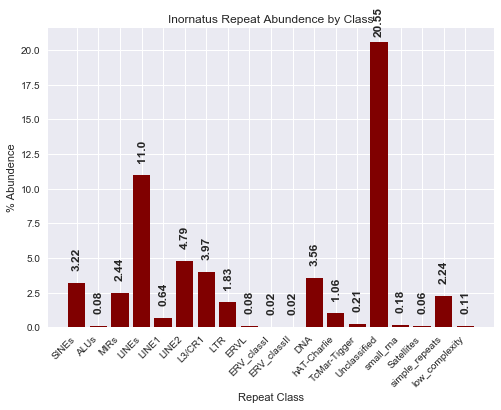

In [10]:
plot_repeats('/n/projects/tfording/a_inornata/repeatmasker/repeat_masker_rutendo/inornata/inornata.table.txt')

# Transcriptome Comparison

## Annotating The AspIno Transcriptome

### Trinnotate Pipeline Scripts

I started this process by running Trinnotate on the Inornata transcriptome. Trinnotate is apart of an established pipeline that can be found (https://trinotate.github.io/). The commands are as follows:

In [ ]:
#blastx -query Trinity.fasta -db uniprot_sprot.pep -num_threads 8 -max_target_seqs 1 -outfmt 6 > blastx.outfmt6

This command uses blastx to search the Trinity transcriptome assembly for transcripts.

In [ ]:
#blastp -query transdecoder.pep -db uniprot_sprot.pep -num_threads 8 -max_target_seqs 1 -outfmt 6 > blastp.outfmt6

This command uses blastp to seach Swissprot database for Transdecoder-predicted proteins. It creates a database of proteins to be used later in the pipeline

In [ ]:
#hmmscan --cpu 8 --domtblout TrinotatePFAM.out Pfam-A.hmm transdecoder.pep > pfam.log

HMMER identifies protein domains and outputs a log of all the protein domains found.

In [2]:
#./signalp -f short -n signalp_short.out /n/projects/tfording/a_inornata/transcriptome/Transcriptome_annotation/ino_trans_longestorfs.pep

SignalP predicts signal peptides in the transcriptome

In [1]:
#tmhmm --short < transdecoder.pep > tmhmm.out

tmHMM predicts transmembrane regions.

In [3]:
#/n/projects/tfording/a_inornata/transcriptome/bin/Trinnotate/util/rnammer_support/RnammerTranscriptome.pl --transcriptome inornataTranscriptome.fasta --path_to_rnammer /n/projects/tfording/a_inornata/transcriptome/bin/rnammer-1.2.src/rnammer 

RNAMMER identifies rRNA transcripts it outputs a file called inornataTranscriptome.fasta.rnammer.gff

"RNAMMER was originally developed to identify rRNA genes in genomic sequences. To have it identify rRNA sequences among our large sets of transcriptome sequences, we first concatenate all the transcripts together into a single super-scaffold, run RNAMMER to identify rRNA homologies, and then transform the rRNA feature coordinates in the super-scaffold back to the transcriptome reference coordinates. The following script will perform all of these operations:" -(https://trinotate.github.io/)

**Note to self:** The installation of RNAmmer requires some hacking. I attempted to do as trinotate's website instructed, but the code seems to have been changed since they wrote their hack instructions. They note that this is not a required step to finish annotation, but I would like to produce as complete an annotation as is possible, so I am going to spend some more time trying to a solution. 

## Annotation Data Exploration

### BlastX Hits by %

**Number of 100% BlastX hits: 13103**

In [ ]:
#awk 'BEGIN {count=0 ;} $3 == "100.000" {count ++ ;} END {print count ;}' inornata_blastx.outfmt6

**Number of 95% BlastX hits: 21676**

**Number of 90% BlastX hits: 55868**

**Number of 85% BlastX hits: 89550**

**Number of 80% BlastX hits: 122962**

**Number of 75% BlastX hits: 154266**

**Number of 70% BlastX hits: 184451**